Lecture XYZ + Matplotlib des OM (Code final)

Nombre d'atomes dans le fichier : 4

Matrice d'adjacence :
[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]

Valeurs propres de la matrice de Hückel : [np.float64(1.6180339887498942), np.float64(0.6180339887498952), np.float64(-0.6180339887498946), np.float64(-1.6180339887498947)]
1.6180339887498942 -1.6180339887498947
Énergie π totale : E_pi = 4.472135954999579 β + 4 α


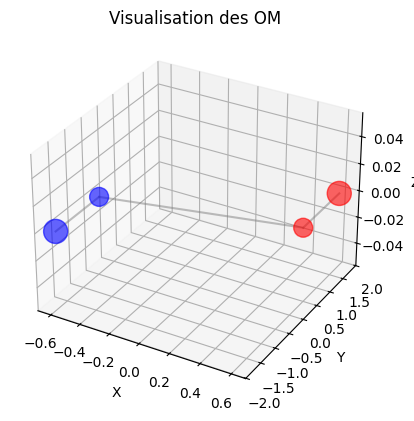

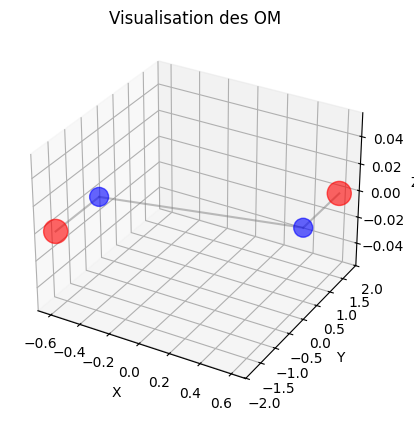

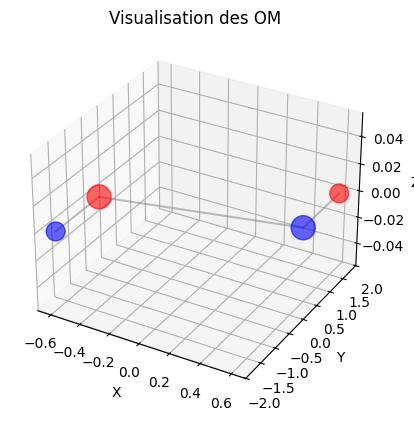


Coordonnées topologiques :
Atome 1: x = 0.3897, y = 0.3162, z = 0.1730
Atome 2: x = 0.2409, y = -0.1954, z = -0.2799
Atome 3: x = -0.2409, y = -0.1954, z = 0.2799
Atome 4: x = -0.3897, y = 0.3162, z = -0.1730

Force rotationnelle topologique HOMO→LUMO : R = 1.08078e-01


In [20]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sys

# Distances des liaisons simples et doubles entre atomes de carbone (en Å)
DISTANCES_LIAISONS = {
    ('C', 'C'): {'simple': 1.54, 'double': 1.34}}

TOLERANCE = 0.07  # Tolérance sur la distance (en Å)

#Lecture du fichier .xyz

def lire_xyz(fichier):
    """Lire un fichier .xyz et renvoyer les coordonnees des atomes dans l'ordre (x, y, z)."""
    try:
        with open(fichier, 'r') as file:
            lines = file.readlines()            
            # Nettoyer les lignes : enlever les espaces en trop, et ignorer les
            # lignes vides ou les commentaires
            lines = [line.strip() for line in lines if line.strip()]

            try:
                n = int(lines[0])
            except ValueError:
                print(
                    f"Erreur : La premiere ligne du fichier {fichier} ne contient pas un entier valide.")
                sys.exit(1)

            print(f"Nombre d'atomes dans le fichier : {n}")

            atomes = []
            # On commence à  la ligne 1 (index 1) car la ligne 1 du fichier original a été ignorée
            for i in range(1, n + 1):
                if i >= len(lines):
                    print(f"Erreur : Le fichier contient moins de lignes que prÃ©vu ({n} atomes).")
                    sys.exit(1)
                    
                ligne = lines[i].split()

                # Si la longueur de la ligne est inférieure à 4 valeurs = erreur ?
                if len(ligne) < 4:
                    print(
                        f"Erreur : Format incorrect Ã  la ligne {i+1} dans le fichier {fichier}.")
                    sys.exit(1)

                element = ligne[0]  # Le type d'element atomique
                try:
                    # Recuperer les coordonnees x, y et z
                    x, y, z = map(float, ligne[1:4])
                except ValueError:
                    print(
                        f"Erreur : Les coordonnees à la ligne {i+1} ne sont pas des nombres valides.")
                    sys.exit(1)
                atomes.append((element, x, y, z))  # Conserver cet ordre (x, y, z)
        return atomes
    except FileNotFoundError:
        print(f"Erreur : Le fichier {fichier} n'existe pas.")
        sys.exit(1)

#Construction de la matrice adjacente
def matrice_adjacente(atomes):
    n = len(atomes)
    Distance_max_liaison = 1.5
    matrice = np.zeros((n, n), dtype=float)
    for ielem in range(n):
        xi = atomes[ielem][1]
        yi = atomes[ielem][2]
        zi = atomes[ielem][3]
        for jelem in range (ielem+1, n):
            xj = atomes[jelem][1]
            yj = atomes[jelem][2]
            zj = atomes[jelem][3]
            dist = np.sqrt( (xj-xi) ** 2 + (yj-yi) ** 2 + (zj-zi) ** 2)
            if dist < Distance_max_liaison :
                matrice[ielem,jelem] = matrice[jelem,ielem] = 1.0
    return matrice

def normaliser_vecteur(v):
    norme = np.linalg.norm(v)
    if norme > 0:
        return v / norme
    return v

#Calcul de l'énergie de la molécule en fonction de alpha et beta
def energie_pi(H):
    valeurs, vecteurs_propres = np.linalg.eigh(H)
    valeurs = sorted(valeurs, reverse=True)
    n_electrons = H.shape[0]
    OM_occupees = n_electrons // 2
    E_pi = 2 * sum(valeurs[:OM_occupees])
    return E_pi, valeurs, vecteurs_propres

# Nouveau
def coordonnees_topologiques(matrice_adj, atomes, kx=-2, ky=-3, kz=-4):                                                                    # Changez les valeurs de kx, ky et kz ici
    valeurs_propres, vecteurs_propres = np.linalg.eigh(matrice_adj)

    a1 = 3.0
    akx = valeurs_propres[kx]
    aky = valeurs_propres[ky]
    akz = valeurs_propres[kz]
    
    sx = 1.0 / np.sqrt(a1 - akx)
    sy = 1.0 / np.sqrt(a1 - aky)
    sz = 1.0 / np.sqrt(a1 - akz)

    coords_topo = []
    n = len(atomes)
    for i in range(n):
        xi = sx * vecteurs_propres[:, kx][i]
        yi = sy * vecteurs_propres[:, ky][i]
        zi = sz * vecteurs_propres[:, kz][i]
        coords_topo.append((xi, yi, zi))
    
    return coords_topo

#Affichage/Visualisation des OM
def afficher_orbitale(atomes, vecteur_propre, titre="Orbitale moléculaire", projection='2d', matrice_adj=None):
    fig = plt.figure()
    if projection == '3d':
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = fig.add_subplot(111)

    xs = [a[1] for a in atomes]
    ys = [a[2] for a in atomes]
    zs = [a[3] for a in atomes]

    tailles = [abs(c) * 500 for c in vecteur_propre]  # Taille de la bulle proportionnelle au coeff
    couleurs = ['red' if c > 0 else 'blue' for c in vecteur_propre]

    if matrice_adj is not None:
        for i in range(len(atomes)):
            for j in range(i+1, len(atomes)):
                if matrice_adj[i, j] != 0:
                    x_coords = [xs[i], xs[j]]
                    y_coords = [ys[i], ys[j]]
                    if projection == '3d':
                        z_coords = [zs[i], zs[j]]
                        ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)
                    else:
                        ax.plot(x_coords, y_coords, color='gray', alpha=0.5)

    if projection == '3d':
        ax.scatter(xs, ys, zs, s=tailles, c=couleurs, alpha=0.6)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    else:
        ax.scatter(xs, ys, s=tailles, c=couleurs, alpha=0.6, edgecolors='k')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.axis('equal')

    ax.set_title('Visualisation des OM')
    plt.show()

# Modifier
#Calcul Rab Force rotationnelle topologique dans la transition HOMO vers LUMO
def force_rotationnelle_topologique(atomes, A, vecs, index_HOMO, index_LUMO, coords_topo):
    a = normaliser_vecteur(vecs[:, index_HOMO])
    b = normaliser_vecteur(vecs[:, index_LUMO])

    # Coordonnées topologiques à partir des vecteurs propres
    x = np.array([c[0] for c in coords_topo])
    y = np.array([c[1] for c in coords_topo])
    z = np.array([c[2] for c in coords_topo])


    # Centrer les coordonnées
    x = x - np.mean(x)
    y = y - np.mean(y)
    z = z - np.mean(z)

    R = 0.0
    n = len(atomes)
    for i in range(n):
        r_i = np.array([x[i], y[i], z[i]])
        aibi = a[i] * b[i]

        sum_inner = np.zeros(3)
        for k in range(n):
            for l in range(n):
                if A[k, l] != 0:
                    delta_r = np.array([x[k] - x[l], y[k] - y[l], z[k] - z[l]])
                    sum_inner += A[k, l] * a[k] * b[l] * delta_r

        R += aibi * np.dot(r_i, sum_inner)
    return R


# Modifier
def main():
    fichier_xyz = 'butadiene.xyz'                                                                                                           #<-- Placer le nom du fichier sur cette ligne
    atomes = lire_xyz(fichier_xyz)
    #print(atomes)
    matrice_adjacence = matrice_adjacente(atomes)

    print("\nMatrice d'adjacence :")
    print(matrice_adjacence)

    # Calcul de l'énergie pi
    E_pi, valeurs, vecteurs_propres = energie_pi(matrice_adjacence)
    print("\nValeurs propres de la matrice de Hückel :", valeurs)
    print(valeurs[0], valeurs[-1])
    print(f"Énergie π totale : E_pi = {E_pi} β + {len(matrice_adjacence)} α")
    


    HOMO_index = len(atomes) // 2 - 1
    #afficher_orbitale(atomes, vecteurs_propres[:, HOMO_index], "HOMO", projection='3d', matrice_adj=matrice_adjacence)
    LUMO_index = HOMO_index + 1
    #afficher_orbitale(atomes, vecteurs_propres[:, LUMO_index], "LUMO", projection='3d', matrice_adj=matrice_adjacence)
    
    coords_topo = coordonnees_topologiques(matrice_adjacence, atomes, kx=-2, ky=-3, kz=-4)                                                 # <-- Corriger les bonnes orbitales p-like à utiliser
    for k in [-2, -3, -4]:                                                                                                                 # Et ici
        titre = f"OM la plus stable n°{k} (valeur propre = {valeurs[k]:.2f})"
        afficher_orbitale(atomes, vecteurs_propres[:, k], titre, projection='3d', matrice_adj=matrice_adjacence)
    plt.pause(0.1)

    print("\nCoordonnées topologiques :")
    for i, (x, y, z) in enumerate(coords_topo):
        print(f"Atome {i+1}: x = {x:.4f}, y = {y:.4f}, z = {z:.4f}")
    
    R_topologique = force_rotationnelle_topologique(atomes, matrice_adjacence, vecteurs_propres,
                                                    HOMO_index, LUMO_index, coords_topo)

    print(f"\nForce rotationnelle topologique HOMO→LUMO : R = {R_topologique:.5e}")

if __name__ == "__main__":
    main()
